- This notebook contains the preprocessing steps of the Literacy Rate dataset (relating to the theme of social good).

- The notebook also contains the algorithm that runs behind the Machine Learning Model (Literacy Rate Predictor) on Streamlit. I implemented an XGBoost regression algorithm and used RandomizedSearchCV to find the optimal set of hyperparameters to produce the best score for the Literacy Rate Predictor Model.


In [ ]:
# Literacy Rate Dataset from Kaggle

from google.colab import drive
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


drive.mount('/content/drive')

file_path = f'/content/drive/MyDrive/Literacy rates (no pw2).csv'


df = pd.read_csv(file_path)

df2 = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,Region,Country,Year,Age,Gender,Literacy rate
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791


In [ ]:
df_15plus = df[ (df['Age'] == '15+') & (df['Gender'] == 'total') & (df['Year'] == 2018)]
new_df = df_15plus.sort_values( by = ['Literacy rate'], ascending = True)

new_df.head(20)

,index,Region,Country,Year,Age,Gender,Literacy rate
4777,4777,Sub-Saharan Africa,South Sudan,2018,15+,total,0.345228
4414,4414,Sub-Saharan Africa,Mali,2018,15+,total,0.354738
3970,3970,Sub-Saharan Africa,Central African Republic,2018,15+,total,0.373958
3874,3874,Sub-Saharan Africa,Burkina Faso,2018,15+,total,0.412244
3826,3826,Sub-Saharan Africa,Benin,2018,15+,total,0.423624
13,13,Central and Southern Asia,Afghanistan,2018,15+,total,0.430197
4693,4693,Sub-Saharan Africa,Sierra Leone,2018,15+,total,0.432063
4078,4078,Sub-Saharan Africa,Côte d'Ivoire,2018,15+,total,0.471653
3082,3082,Northern Africa and Western Asia,Iraq,2018,15+,total,0.501405
4018,4018,Sub-Saharan Africa,Comoros,2018,15+,total,0.588170


In [ ]:
centraly = df.loc[df['Region'] == "Sub-Saharan Africa", 'Country'].unique()

centralylist = centraly.tolist()

print(centralylist)

['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa', 'South Sudan', 'Swaziland', 'Togo', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe']



#Data Exploration

Let's utilize some of the plots from seaborn and matplotlib to understand the nature of the dataset.


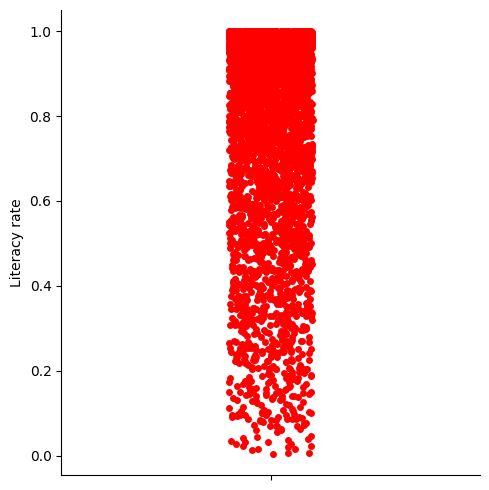

In [ ]:
# catplot of the literacy rate (most of the countries in the dataset have a literacy rate around 80%)
sns.catplot(df['Literacy rate'], color = 'red')

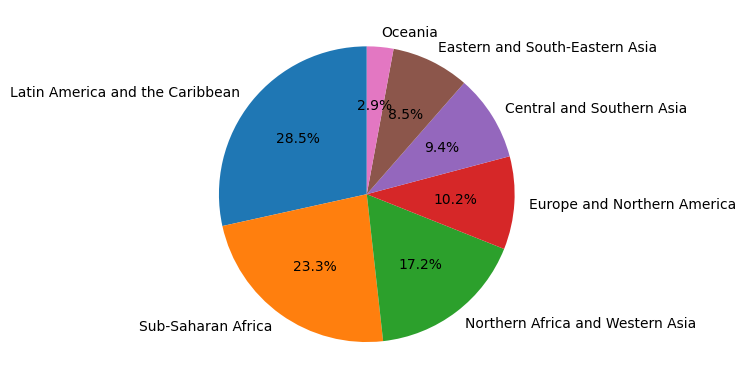

In [ ]:
unique_region = df['Region'].value_counts()

percentage_distribution = (unique_region / len(df)) * 100

plt.pie(data=df, x = percentage_distribution, labels = df['Region'].value_counts().index, autopct = '%1.1f%%', startangle = 90)
plt.show()

In [ ]:
# Data Exploration (df is the changed dataframe, and df2 will hold the copy of the original dataframe)

index = 0


df = df.drop(df[df['Gender'] == 'total'].index) # dropping the total place

df = df.drop(columns = ['index'], axis = 1)  # dropping the index column


df


,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791
6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128
...,...,...,...,...,...,...
4947,Sub-Saharan Africa,Zimbabwe,2014,15-24,male,0.875919
4949,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.880485
4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255
4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258


In [ ]:
import plotly.express as px # Analyzing the literacy rate of Brazil from 2011-2018.

df2 = df.query("Country == 'Brazil' ")
fig = px.bar(df2, x = 'Year', y = 'Literacy rate', height = 400, title = "Literacy rate in Brazil")

fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Making the categorical variables into numerical variables.

categorical_variables_array = ['Region', 'Country', 'Year', 'Age', 'Gender']

le_categorical = LabelEncoder()

for element in categorical_variables_array:
  df[element] = le_categorical.fit_transform(df[element])


df

,Region,Country,Year,Age,Gender,Literacy rate
0,0,0,1,0,0,0.176121
1,0,0,1,0,1,0.454171
3,0,0,1,1,0,0.321132
4,0,0,1,1,1,0.618791
6,0,0,1,2,0,0.084128
...,...,...,...,...,...,...
4947,6,154,4,1,1,0.875919
4949,6,154,4,2,0,0.880485
4950,6,154,4,2,1,0.897255
4952,6,154,4,3,0,0.734258


In [ ]:
X = df.drop('Literacy rate', axis = 1)
y = df['Literacy rate']

### Splitting the data into training and testing sets.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2642, 5)
(661, 5)
(2642,)
(661,)


In [ ]:
import xgboost as xgb

from sklearn.model_selection import KFold, RandomizedSearchCV
param_dist = {
    'max_depth': [3, 4, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 125, 150, 200] # I don't know
}


xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 1)

skf = KFold(n_splits = 5, shuffle = True, random_state = 1)

random_search_cv = RandomizedSearchCV(estimator = xgb_model, param_distributions= param_dist, n_iter = 10, scoring = 'neg_mean_squared_error', cv = skf, n_jobs = -1)

random_search_cv.fit(X_train, y_train)




RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=1, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [3, 4, 5, 7],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [100, 125, 150, 200]},
                   scoring='neg_mean_squared_error')

In [ ]:
print("The best parameters are: ", random_search_cv.best_params_)
print("The best score is: ", random_search_cv.best_score_)


The best parameters are:  {'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1}
The best score is:  -0.006671290112698782


### Function to calculate the MSE (Mean Squared Error) between the predicted test outputs and the acutal outputs for the test data.

In [ ]:
y_pred = random_search_cv.predict(X_test)

def calculate_mse_error(array1, array2):
  square_array = []
  for element in range(len(array1)):
    square = (array1[element] - array2[element])**2
    square_array.append(square)

  sum_array = sum(square_array)

  mse_error = sum_array / (len(array1))

  return mse_error


y_test = list(y_test)
y_pred = list(y_pred)

print(calculate_mse_error(y_pred, y_test)) # calculates mse error between testing and predicted values

0.00529051416616051


In [ ]:
array_prediction = [0, 0, 2, 3, 0]
array_prediction2 = [array_prediction]
prediction = random_search_cv.predict(np.asarray(array_prediction2))

print(prediction)

[0.077962]


In [ ]:
# saving the data for future use, and we will load the model in Streamlit.
import joblib
joblib.dump(random_search_cv, 'xgb_best_model.pkl')


['xgb_best_model.pkl']